<a href="https://colab.research.google.com/github/MernaHesham10/Loan-Prediction/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Collection & Preprocessing**


In [ ]:
### Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

### Data Collection & Preprocessing
loan_dataset = pd.read_csv('Train data.csv')
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Show NO of rows, col in loan_dataset
loan_dataset.shape

(614, 13)

In [ ]:
# Show statistical Measure
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# Show No of Missing Values in Each col
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Dropping the missing values
loan_dataset = loan_dataset.dropna()

In [ ]:
# No of Missing Values in Each col
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# label Encoding 
loan_dataset.replace({"Loan_Status" :{'N': 0, 'Y': 1}}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
# the frist 5 rows of DataFrame
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
# Dependent col Values
loan_dataset['Dependents'].value_counts()

# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

# Dependent col Values
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

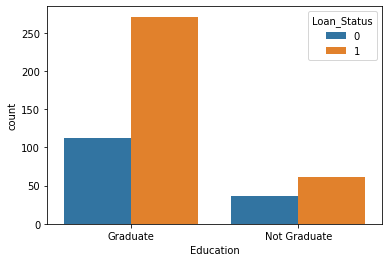

In [ ]:
# Data Visualization

# Education & loan Status
sns.countplot(x = 'Education', hue = 'Loan_Status', data = loan_dataset)

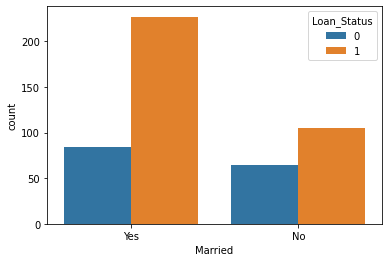

In [ ]:
# marital Status & loan Status
sns.countplot(x = 'Married', hue = 'Loan_Status', data = loan_dataset) 

In [ ]:
# convert categorical col to numerical Val
loan_dataset.replace({'Married' : {'No': 0, 'Yes': 1}, 'Gender' : {'Male': 1, 'Female': 0}, 'Self_Employed': {'No': 0, 'Yes': 1}, 
'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2}, 'Education': {'Graduate': 1, 'Not Graduate': 0}}, inplace = True)

loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


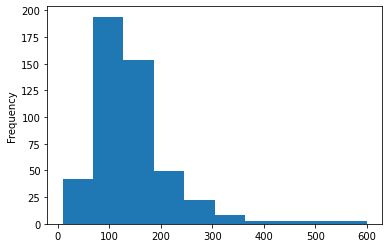

In [ ]:
loan_dataset['LoanAmount'].plot(kind="hist", bins=10)

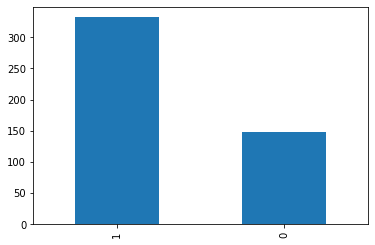

In [ ]:
loan_dataset['Loan_Status'].value_counts().plot(kind='bar')

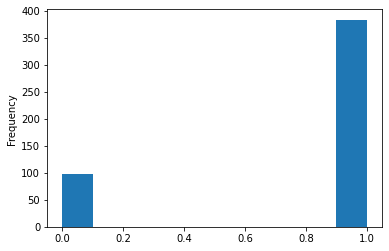

In [ ]:
loan_dataset['Education'].plot(kind="hist", bins=10)

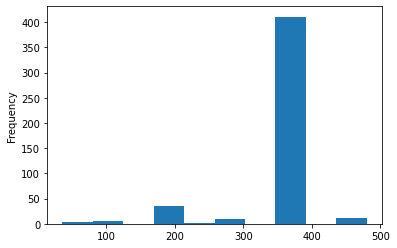

In [ ]:
loan_dataset['Loan_Amount_Term'].plot(kind="hist", bins=10)

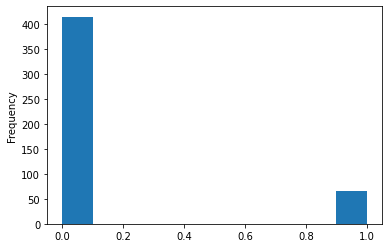

In [ ]:
loan_dataset['Self_Employed'].plot(kind="hist", bins=10)

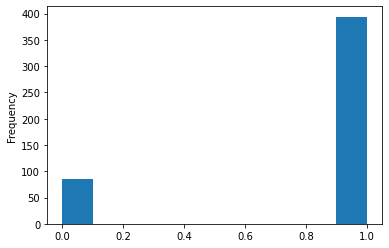

In [ ]:
loan_dataset['Gender'].plot(kind="hist", bins=10)

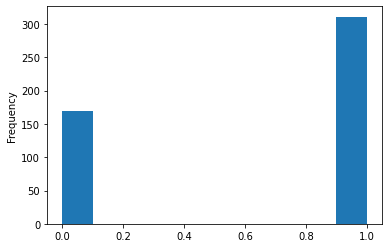

In [ ]:
loan_dataset['Married'].plot(kind="hist", bins=10)

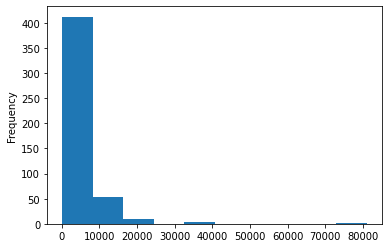

In [ ]:
loan_dataset['ApplicantIncome'].plot(kind="hist", bins=10)

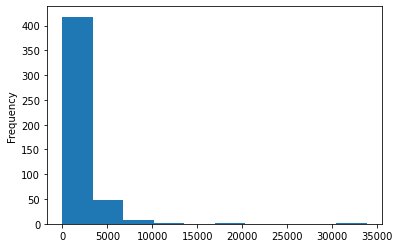

In [ ]:
loan_dataset['CoapplicantIncome'].plot(kind="hist", bins=10)

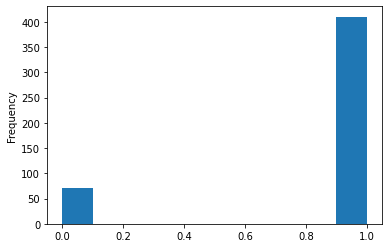

In [ ]:
loan_dataset['Credit_History'].plot(kind="hist", bins=10)

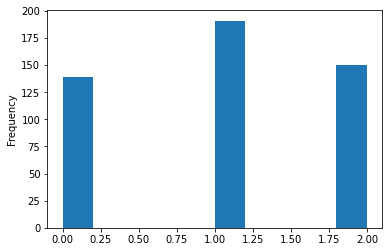

In [ ]:
loan_dataset['Property_Area'].plot(kind="hist", bins=10)

In [ ]:
# Separating into Data, Label
X = loan_dataset.drop(columns= ['Loan_ID', 'Loan_Status'], axis=1)
Y = loan_dataset['Loan_Status'] 

print(X)
print(Y)

# Split Data into Training, and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify= Y, random_state = 2)

print(X.shape, X_train.shape, X_test.shape)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

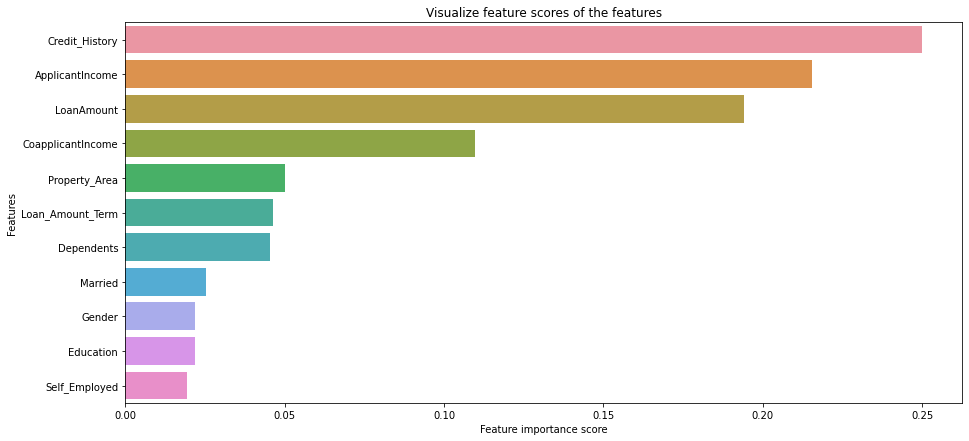

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_Classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_Classifier.fit(X_train, Y_train)
ImportentFeature = pd.Series(rfc_Classifier.feature_importances_, index=X.columns).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.barplot(x=ImportentFeature, y=ImportentFeature.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(ImportentFeature.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


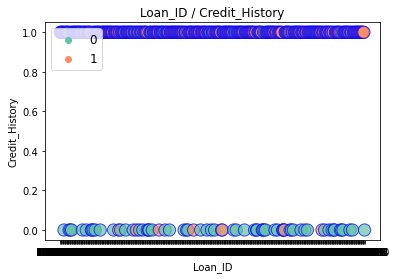

In [ ]:
# 1. Sepal scatter visualization
from termcolor import colored as cl # elegant printing of text
import seaborn as sb # visualizations
import matplotlib.pyplot as plt # editing visualizations
from matplotlib import style # setting styles for plots
from sklearn.preprocessing import StandardScaler # normalizing data
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.metrics import accuracy_score # algorithm accuracy
from sklearn.model_selection import train_test_split # splitting the data

sb.scatterplot('Loan_ID', 'Credit_History', data = loan_dataset, hue = 'Loan_Status', palette = 'Set2', edgecolor = 'b', s = 150, alpha = 0.7)
plt.title('Loan_ID / Credit_History')
plt.xlabel('Loan_ID')
plt.ylabel('Credit_History')
plt.legend(loc = 'upper left', fontsize = 12)
plt.savefig('sepal.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


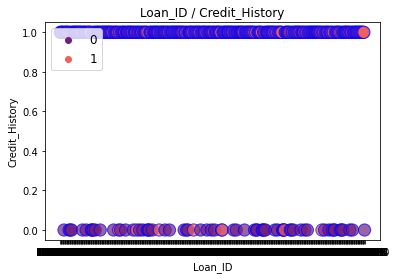

In [ ]:
# 2. Petal scatter visualization

sb.scatterplot('Loan_ID', 'Credit_History', data = loan_dataset, hue = 'Loan_Status', palette = 'magma', edgecolor = 'b', s = 150, 
               alpha = 0.7)
plt.title('Loan_ID / Credit_History')
plt.xlabel('Loan_ID')
plt.ylabel('Credit_History')
plt.legend(loc = 'upper left', fontsize = 12)
plt.savefig('petal.png')

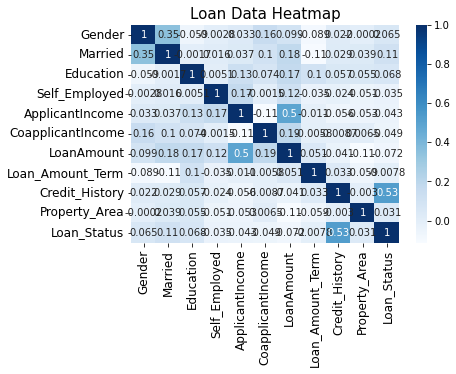

In [ ]:
# 3. Data Heatmap

df_corr = loan_dataset.corr()

sb.heatmap(df_corr, cmap = 'Blues', annot = True, xticklabels = df_corr.columns.values, yticklabels = df_corr.columns.values)
plt.title('Loan Data Heatmap', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('heatmap.png')

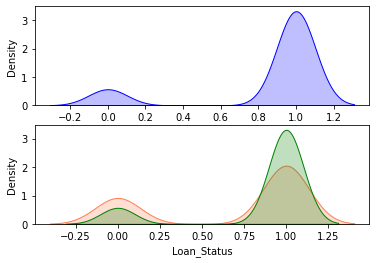

In [ ]:
# 4. Distribution plot

plt.subplot(211)
sb.kdeplot(loan_dataset['Credit_History'], color = 'b', shade = True, label = 'Sepal Width')

plt.subplot(212)
sb.kdeplot(loan_dataset['Loan_Status'], color = 'coral', shade = True, label = 'Petal Length')
sb.kdeplot(loan_dataset['Credit_History'], color = 'green', shade = True, label = 'Petal Width')

plt.savefig('dist.png')

In [ ]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


# ***Training The Model (83.333%)*** 
 
**Vector Machine Model**

VM_Training Data Accuracy =  79.86111111111111
VM_Testing Data Accuracy =  83.33333333333334




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


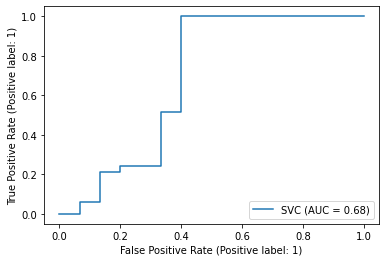


Matrix Of Training Support Vector Machine = 
 [[ 50  83]
 [  4 295]]

Matrix Of Testing Support Vector Machine = 
 [[ 9  6]
 [ 2 31]]

classification_report = 
                precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.84      0.94      0.89        33

    accuracy                           0.83        48
   macro avg       0.83      0.77      0.79        48
weighted avg       0.83      0.83      0.83        48



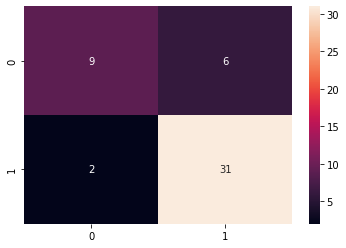

In [ ]:
# Import Libraries
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics, model_selection, svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

VM_classifier = svm.SVC(kernel='linear')

# training the Support Vector Machine Model
VM_classifier.fit(X_train, Y_train)

### Model Evaluation ###

# Predict the Train set results 
VM_X_TrainPrediction = VM_classifier.predict(X_train)

# Calculate VM_Training Data Accuracy
VM_TrainingDataAccuracy = accuracy_score(VM_X_TrainPrediction, Y_train)
print('VM_Training Data Accuracy = ', VM_TrainingDataAccuracy * 100)

# Predict the Test set results
VM_X_TestPrediction = VM_classifier.predict(X_test)

# Calculate VM_Testing Data Accuracy
VM_TestingDataAccuracy = accuracy_score(VM_X_TestPrediction, Y_test)
print('VM_Testing Data Accuracy = ', VM_TestingDataAccuracy * 100)
print('\n')

### Visualization Model ###

# Visualize support vectors
metrics.plot_roc_curve(VM_classifier, X_test, Y_test) 
plt.show()

VM_Training_CM = confusion_matrix(Y_train, VM_X_TrainPrediction)
print('\nMatrix Of Training Support Vector Machine = \n', VM_Training_CM)
VM_Testing_CM = confusion_matrix(Y_test, VM_X_TestPrediction)
print('\nMatrix Of Testing Support Vector Machine = \n', VM_Testing_CM)

sns.heatmap(VM_Testing_CM, annot=True)
plt.savefig('VM_Testing_CM.png')

# printing the report
print('\nclassification_report = \n ',classification_report(Y_test, VM_X_TestPrediction))

#**Training The Model**
 **Decision Tree Model (70.8%)**



      Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
1    LP001003       1        1          1          1              0   
2    LP001005       1        1          0          1              1   
3    LP001006       1        1          0          0              0   
4    LP001008       1        0          0          1              0   
5    LP001011       1        1          2          1              1   
..        ...     ...      ...        ...        ...            ...   
609  LP002978       0        0          0          1              0   
610  LP002979       1        1          4          1              0   
611  LP002983       1        1          1          1              0   
612  LP002984       1        1          2          1              0   
613  LP002990       0        0          0          1              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


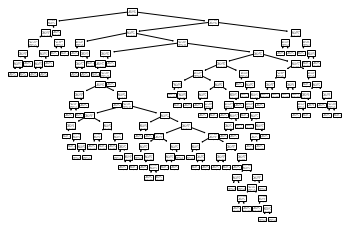

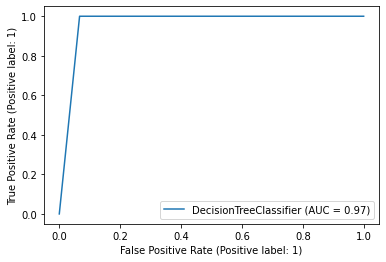

In [ ]:
# Import Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree # tree diagram
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt # visualization
from matplotlib import rcParams # figure size
from sklearn.metrics import confusion_matrix
from termcolor import colored as cl # text customization
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm

labelEncoder = LabelEncoder()
labelEncoder.fit(loan_dataset['Loan_Status'])

loan_dataset['Loan_Status'] = labelEncoder.transform(loan_dataset['Loan_Status'])
print(loan_dataset)

DecisionTree_train = loan_dataset.iloc[0: 384, :]
print(DecisionTree_train)

DecisionTree_test = loan_dataset.iloc[384: , :]
print(DecisionTree_test)

DecisionTree_classifier = DecisionTreeClassifier()
DecisionTree_classifier = DecisionTree_classifier.fit(DecisionTree_train.iloc[: ,1 : 12], DecisionTree_train['Loan_Status'])
print(plot_tree(DecisionTree_classifier))

### Model Evaluation ###

# Predict the Train set results 
DT_X_TrainPrediction  = DecisionTree_classifier.predict(DecisionTree_train.iloc[:, 1:12])

# Calculate Decision Tree training Accuracy
DT_TrainingDataAccuracy  = accuracy_score(DecisionTree_train['Loan_Status'], DT_X_TrainPrediction)
print("\nDM_Training Data Accuracy = ", DT_TrainingDataAccuracy * 100)

# Predict the Test set results 
DT_X_TestPrediction = DecisionTree_classifier.predict(DecisionTree_test.iloc[:, 1:12])

# Calculate training_data_accuracy
DT_TestingDataAccuracy = accuracy_score(DecisionTree_test['Loan_Status'], DT_X_TestPrediction)
print("\nDM_Testing Data Accuracy = ", DT_TestingDataAccuracy * 100)
print('\n')

### Visualization Model ###
tree.plot_tree(DecisionTree_classifier)
plt.savefig('DecisionTree_classifier1.png')

metrics.plot_roc_curve(DecisionTree_classifier, X_test, Y_test) 
plt.show()


**Decision Tree Classifier with criterion entropy (77.08%)**

DT_Entropy_Training Data Accuracy =  82.4074074074074
DT_Entropy_Test Data Accuracy =  77.08333333333334

Training set score:  0.8240740740740741
Test set score:  0.7708333333333334

Matrix Of Training Decision Tree = 
 [[ 60  73]
 [  3 296]]

Matrix Of Testing Decision Tree = 
 [[ 6  9]
 [ 2 31]]




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


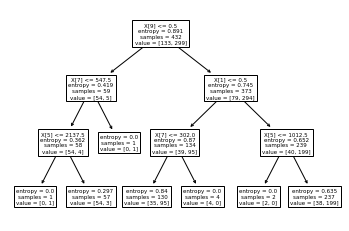

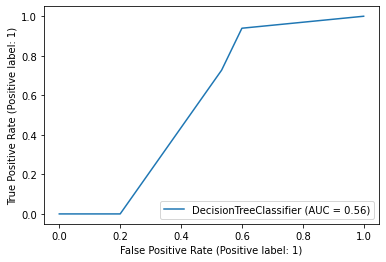


Matrix Of Training Decision Tree = 
 [[ 60  73]
 [  3 296]]

Matrix Of Testing Decision Tree = 
 [[ 6  9]
 [ 2 31]]
              precision    recall  f1-score   support

           0       0.75      0.40      0.52        15
           1       0.78      0.94      0.85        33

    accuracy                           0.77        48
   macro avg       0.76      0.67      0.69        48
weighted avg       0.77      0.77      0.75        48



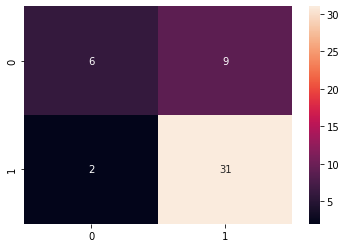

In [ ]:
# Decision Tree Classifier with criterion entropy

# instantiate the DecisionTreeClassifier model with criterion entropy
DecisionTree_ClassifierEntropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
DecisionTree_ClassifierEntropy.fit(X_train, Y_train)

### Model Evaluation ###

# Predict the Train set results with criterion entropy
DT_Entropy_X_TrainPrediction = DecisionTree_ClassifierEntropy.predict(X_train)

# Calculate DM_Entropy_Training Data Accuracy
DT_Entropy_TrainingDataAccuracy = accuracy_score(DT_Entropy_X_TrainPrediction, Y_train)
print('DT_Entropy_Training Data Accuracy = ', DT_Entropy_TrainingDataAccuracy * 100)

# Predict the Test set results with criterion entropy
DT_Entropy_X_TestPrediction  = DecisionTree_ClassifierEntropy.predict(X_test)

# Calculate VM_TestiDM_Entropy_Training  Data Accuracy
DT_Entropy_TestDataAccuracy = accuracy_score(DT_Entropy_X_TestPrediction, Y_test)
print('DT_Entropy_Test Data Accuracy = ', DT_Entropy_TestDataAccuracy * 100)

print('\nTraining set score: ',(DecisionTree_ClassifierEntropy.score(X_train, Y_train)))

print('Test set score: ',(DecisionTree_ClassifierEntropy.score(X_test, Y_test)))

### Visualization Model ###

tree.plot_tree(DecisionTree_ClassifierEntropy)

print('\nMatrix Of Training Decision Tree = \n', confusion_matrix(Y_train, DT_Entropy_X_TrainPrediction))

print('\nMatrix Of Testing Decision Tree = \n', confusion_matrix(Y_test, DT_Entropy_X_TestPrediction))

print('\n')

tree.plot_tree(DecisionTree_ClassifierEntropy)
plt.savefig('DecisionTree_ClassifierEntropy.png')

metrics.plot_roc_curve(DecisionTree_ClassifierEntropy, X_test, Y_test) 
plt.show()

DT_Entropy_Training_CM = confusion_matrix(Y_train, DT_Entropy_X_TrainPrediction)
print('\nMatrix Of Training Decision Tree = \n', DT_Entropy_Training_CM)
DT_Entropy_Testing_CM = confusion_matrix(Y_test, DT_Entropy_X_TestPrediction)
print('\nMatrix Of Testing Decision Tree = \n', DT_Entropy_Testing_CM)

sns.heatmap(DT_Entropy_Testing_CM, annot=True)
plt.savefig('DT_Entropy_Testing_CM.png')

# printing the report
print(classification_report(Y_test, DT_Entropy_X_TestPrediction))

# **Training The Model**
**K-NN Model (59.37%)**


knn_Train Data Accuracy =  80.46875

knn_Test Data Accuracy =  59.375


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


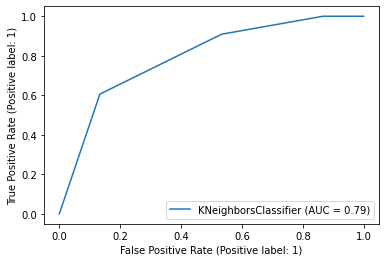

In [ ]:
#import Libraries
from sklearn.neighbors import KNeighborsClassifier

data_train = loan_dataset.iloc[0:  384,:]
data_test = loan_dataset.iloc[384:  ,:]

KNeighbors_Classifier1 = KNeighborsClassifier(n_neighbors= 3 )

# fit the Model
KNeighbors_Classifier1.fit(data_train.iloc[:, 1:12], data_train['Loan_Status'])

### Model Evaluation ###

# Predict the Train set results 
knn_X_TrainPredict = KNeighbors_Classifier1.predict(data_train.iloc[:, 1:12])

# Calculate knn_Train Data Accuracy
knn_TrainDataAccuracy = accuracy_score(data_train['Loan_Status'], knn_X_TrainPredict)
print('\nknn_Train Data Accuracy = ', knn_TrainDataAccuracy * 100)

# Predict the Train set results 
knn_X_TestPredict = KNeighbors_Classifier1.predict(data_test.iloc[:, 1:12])

# Calculate DM_Entropy_Training Data Accuracy
knn_TestDataAccuracy = accuracy_score(data_test['Loan_Status'], knn_X_TestPredict)
print('\nknn_Test Data Accuracy = ', knn_TestDataAccuracy * 100)

### Visualization Model ###
metrics.plot_roc_curve(KNeighbors_Classifier1, X_test, Y_test) 
plt.show()

accuracy_score =  81.25

Training accuracy score:  82.87037037037037

Test accuracy score:  81.25


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


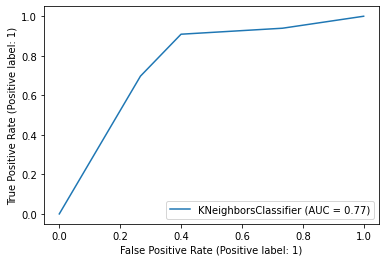


Matrix Of Testing KNN = 
 [[ 9  6]
 [ 3 30]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.83      0.91      0.87        33

    accuracy                           0.81        48
   macro avg       0.79      0.75      0.77        48
weighted avg       0.81      0.81      0.81        48



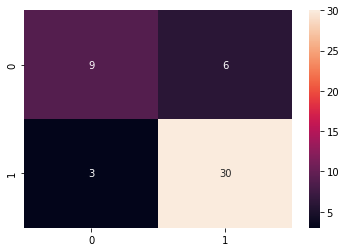

In [ ]:
########## Another Knn Model (81.25%) ###########
# Import Libraries 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from matplotlib import cm
from sklearn.metrics import confusion_matrix
from sklearn import metrics, model_selection, svm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.metrics import classification_report

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Fit the model
KNeighbors_Classifier2 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

KNeighbors_Classifier2.fit(X_train_std, Y_train)

### Model Evaluation ###

# Predict the Train set results
y_predformodel = KNeighbors_Classifier2.predict(X_test_std)

# Calculate DM_Entropy_Training Data Accuracy
print("accuracy_score = ", accuracy_score(Y_test, y_predformodel)* 100)

# Evaluate the training and test score
print('\nTraining accuracy score: ', KNeighbors_Classifier2.score(X_train_std, Y_train) * 100)
print('\nTest accuracy score: ' , KNeighbors_Classifier2.score(X_test_std, Y_test) * 100)

### Visualization Model ###
metrics.plot_roc_curve(KNeighbors_Classifier2, X_test_std, Y_test) 
plt.show()

KNeighbors2_Testing_CM = confusion_matrix(Y_test, y_predformodel)
print('\nMatrix Of Testing KNN = \n', KNeighbors2_Testing_CM)

sns.heatmap(KNeighbors2_Testing_CM, annot=True)
plt.savefig('KNeighbors2_Testing_CM.png')

print('\n Classification Report \n', classification_report(Y_test,y_predformodel))

[[ 5 10]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.56      0.33      0.42        15
           1       0.74      0.88      0.81        33

    accuracy                           0.71        48
   macro avg       0.65      0.61      0.61        48
weighted avg       0.68      0.71      0.68        48


train_accuracy =  78.93518518518519

test_accuracy =  70.83333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


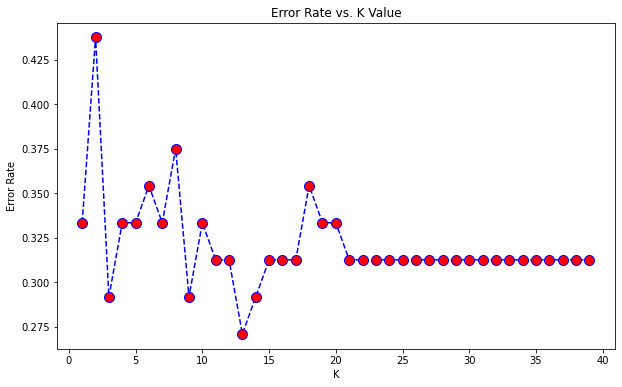

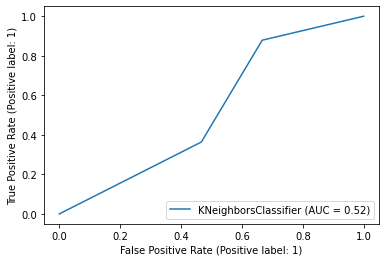


Matrix Of Testing KNN = 
 [[ 5 10]
 [ 4 29]]

Report 
               precision    recall  f1-score   support

           0       0.56      0.33      0.42        15
           1       0.74      0.88      0.81        33

    accuracy                           0.71        48
   macro avg       0.65      0.61      0.61        48
weighted avg       0.68      0.71      0.68        48



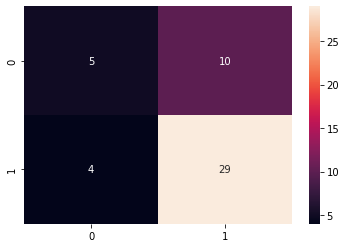

In [ ]:
########## Another Knn Model ###########

# Import Libraries 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from matplotlib import cm
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

pred = knn.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

knntrain_results = knn.predict(X_train)

knntrain_accuracy = accuracy_score(Y_train, knntrain_results)
print('\ntrain_accuracy = ', knntrain_accuracy * 100)

knntest_results = knn.predict(X_test)

knntest_accuracy = accuracy_score(Y_test, knntest_results)
print('\ntest_accuracy = ', knntest_accuracy * 100)

### Visualization Model ###
metrics.plot_roc_curve(knn, X_test, Y_test) 
plt.show()

KNeighbors3_Testing_CM = confusion_matrix(Y_test, knntest_results)
print('\nMatrix Of Testing KNN = \n', KNeighbors3_Testing_CM)

sns.heatmap(KNeighbors3_Testing_CM, annot=True)
plt.savefig('KNeighbors3_Testing_CM.png')

print('\nReport \n', classification_report(Y_test, knntest_results))

# **Training The Model**
**Naive Bayes Model**


GNB_accuracyTrain =  80.72916666666666
\GNB_accuracy Test =  77.08333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


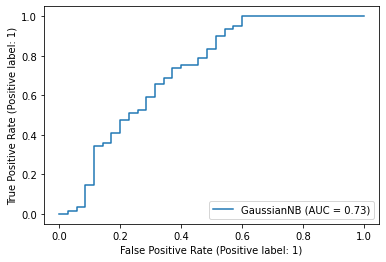


Matrix Of GNB_Training_CM = 
 [[ 54  59]
 [ 15 256]]

Matrix Of GNB_Testing_CM = 
 [[14 21]
 [ 1 60]]
              precision    recall  f1-score   support

           0       0.93      0.40      0.56        35
           1       0.74      0.98      0.85        61

    accuracy                           0.77        96
   macro avg       0.84      0.69      0.70        96
weighted avg       0.81      0.77      0.74        96



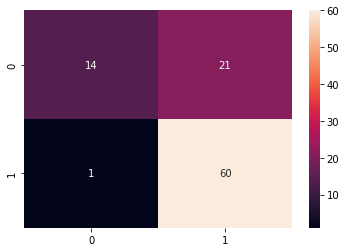

In [ ]:
# Import Packages
from sklearn.naive_bayes import GaussianNB

Naive_X_train, Naive_X_test, Naive_Y_train, Naive_Y_test = train_test_split(loan_dataset.iloc[:, 1:12], loan_dataset['Loan_Status'], test_size=0.2, random_state=0)

GNB_classifier = GaussianNB()

### Model Evaluation ###

# Predict the Train set results 
GNB_predictTrain = GNB_classifier.fit(Naive_X_train, Naive_Y_train).predict(Naive_X_train)

# Calculate Decision Tree training Accuracy
GNB_accuracyTrain = accuracy_score(Naive_Y_train, GNB_predictTrain)
print('\nGNB_accuracyTrain = ', GNB_accuracyTrain * 100)

# Predict the Test set results 
GNB_predictTest = GNB_classifier.fit(Naive_X_train, Naive_Y_train).predict(Naive_X_test)

# Calculate GNB training Accuracy
GNB_accuracyTest = accuracy_score(Naive_Y_test, GNB_predictTest)
print('\GNB_accuracy Test = ', GNB_accuracyTest * 100)

# Visualize 
metrics.plot_roc_curve(GNB_classifier, Naive_X_test, Naive_Y_test) 
plt.show()

GNB_Training_CM = confusion_matrix(Naive_Y_train, GNB_predictTrain)
print('\nMatrix Of GNB_Training_CM = \n', GNB_Training_CM)
GNB_Testing_CM = confusion_matrix(Naive_Y_test, GNB_predictTest)
print('\nMatrix Of GNB_Testing_CM = \n', GNB_Testing_CM)

sns.heatmap(GNB_Testing_CM, annot=True)
plt.savefig('GNB_Testing_CM.png')

# printing the report
print(classification_report(Naive_Y_test, GNB_predictTest)) 


GNB2_accuracy Train =  79.16666666666666

GNB2_accuracy Test =  83.33333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


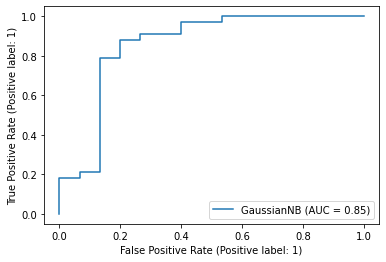


Matrix Of GNB2_Training_CM = 
 [[ 61  72]
 [ 18 281]]

Matrix Of GNB2_Testing_CM = 
 [[10  5]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.77      0.67      0.71        15
           1       0.86      0.91      0.88        33

    accuracy                           0.83        48
   macro avg       0.81      0.79      0.80        48
weighted avg       0.83      0.83      0.83        48



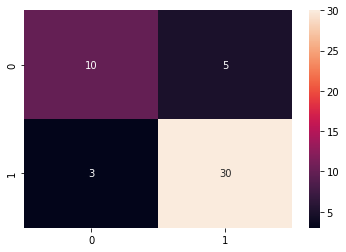

In [ ]:
########## Another Naive Bayes Model ###########
GNB2_classifier = GaussianNB()

### Model Evaluation ###

# Predict the Train set results 
GNB2_predictTrain = GNB2_classifier.fit(X_train, Y_train).predict(X_train)

# Calculate Decision Tree training Accuracy
GNB2_accuracyTrain = accuracy_score(Y_train, GNB2_predictTrain)
print('\nGNB2_accuracy Train = ', GNB2_accuracyTrain * 100)

# Predict the Test set results 
GNB2_predictTest = GNB2_classifier.fit(X_train, Y_train).predict(X_test)

# Calculate GNB training Accuracy
GNB2_accuracyTest = accuracy_score(Y_test, GNB2_predictTest)
print('\nGNB2_accuracy Test = ', GNB2_accuracyTest * 100)

# Visualize 
metrics.plot_roc_curve(GNB2_classifier, X_test, Y_test) 
plt.show()

GNB2_Training_CM = confusion_matrix(Y_train, GNB2_predictTrain)
print('\nMatrix Of GNB2_Training_CM = \n', GNB2_Training_CM)
GNB2_Testing_CM = confusion_matrix(Y_test, GNB2_predictTest)
print('\nMatrix Of GNB2_Testing_CM = \n', GNB2_Testing_CM)

sns.heatmap(GNB2_Testing_CM, annot=True)
plt.savefig('GNB2_Testing_CM.png')

# printing the report
print(classification_report(Y_test, GNB2_predictTest)) 


GNB_accuracy train =  79.86111111111111

GNB_accuracy =  81.25


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


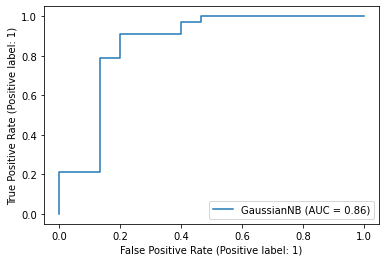


Matrix Of GNB3_Training_CM = 
 [[ 61  72]
 [ 15 284]]

Matrix Of GNB3_Testing_CM = 
 [[ 9  6]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.83      0.91      0.87        33

    accuracy                           0.81        48
   macro avg       0.79      0.75      0.77        48
weighted avg       0.81      0.81      0.81        48



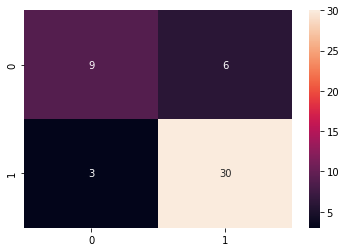

In [ ]:
########## Another Naive Bayes Model ###########
# Import Packages
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.naive_bayes import GaussianNB

sc = StandardScaler()
XXX_train = sc.fit_transform(X_train)
XXX_test = sc.transform(X_test)
 
#Training the Naive Bayes model on the training set
GNB3_Classifier = GaussianNB()
GNB3_Classifier.fit(XXX_train, Y_train)

### Model Evaluation ###

# Predict the Train set results 
GNB3_predictTrain  =  GNB3_Classifier.predict(XXX_train)

# Calculate Decision Tree training Accuracy
GNB3_accuracyTrain = accuracy_score(Y_train, GNB3_predictTrain)
print('\nGNB_accuracy train = ', GNB3_accuracyTrain * 100)

# Predict the Train set results 
GNB3_predictTest  =  GNB3_Classifier.predict(XXX_test)

# Calculate Decision Tree training Accuracy
GNB3_accuracyTest = accuracy_score(Y_test, GNB3_predictTest)
print('\nGNB_accuracy = ', GNB3_accuracyTest * 100)

# Visualize 
metrics.plot_roc_curve(GNB3_Classifier, XXX_test, Y_test) 
plt.show()

GNB3_Training_CM = confusion_matrix(Y_train, GNB3_predictTrain)
print('\nMatrix Of GNB3_Training_CM = \n', GNB3_Training_CM)
GNB3_Testing_CM = confusion_matrix(Y_test, GNB3_predictTest)
print('\nMatrix Of GNB3_Testing_CM = \n', GNB3_Testing_CM)

sns.heatmap(GNB3_Testing_CM, annot=True)
plt.savefig('GNB3_Testing_CM.png')

# printing the report
print(classification_report(Y_test, GNB3_predictTest)) 


GNB_accuracy train =  80.32407407407408

GNB_accuracy =  83.33333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


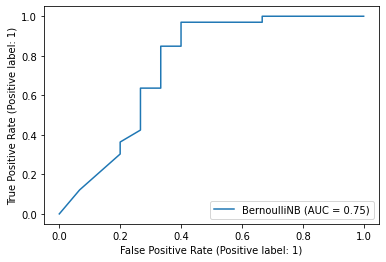


Matrix Of NV_Training_CM = 
 [[ 55  78]
 [  7 292]]

Matrix Of NV_Testing_CM = 
 [[ 9  6]
 [ 2 31]]
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.84      0.94      0.89        33

    accuracy                           0.83        48
   macro avg       0.83      0.77      0.79        48
weighted avg       0.83      0.83      0.83        48



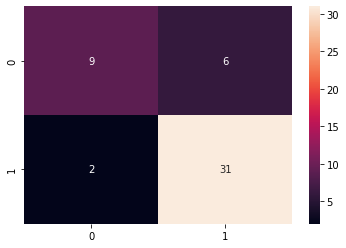

In [ ]:
########## Another Naive Bayes Model ###########

# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import BernoulliNB

# initializaing the NB
NV_Classifier = BernoulliNB()

# training the model
NV_Classifier.fit(X_train, Y_train)

### Model Evaluation ###

# Predict the Train set results 
NV_predictTrain  =  NV_Classifier.predict(X_train)

# Calculate Decision Tree training Accuracy
NV_accuracyTrain = accuracy_score(Y_train, NV_predictTrain)
print('\nGNB_accuracy train = ', NV_accuracyTrain * 100)

# Predict the Train set results 
NV_predictTest  =  NV_Classifier.predict(X_test)

# Calculate Decision Tree training Accuracy
NV_accuracyTest = accuracy_score(Y_test, NV_predictTest)
print('\nGNB_accuracy = ', NV_accuracyTest *100)

# Visualize 
metrics.plot_roc_curve(NV_Classifier, X_test, Y_test) 
plt.show()

NV_Training_CM = confusion_matrix(Y_train, NV_predictTrain)
print('\nMatrix Of NV_Training_CM = \n', NV_Training_CM)
NV_Testing_CM = confusion_matrix(Y_test, NV_predictTest)
print('\nMatrix Of NV_Testing_CM = \n', NV_Testing_CM)

sns.heatmap(NV_Testing_CM, annot=True)
plt.savefig('GNB4_Testing_CM.png')

# printing the report
print(classification_report(Y_test, NV_predictTest)) 


# **Training The Model**
**Random Forest (83.3%)**

RF_Entropy_Training Data Accuracy =  100.0
RF_Entropy_TestDataAccuracy =  83.33333333333334




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


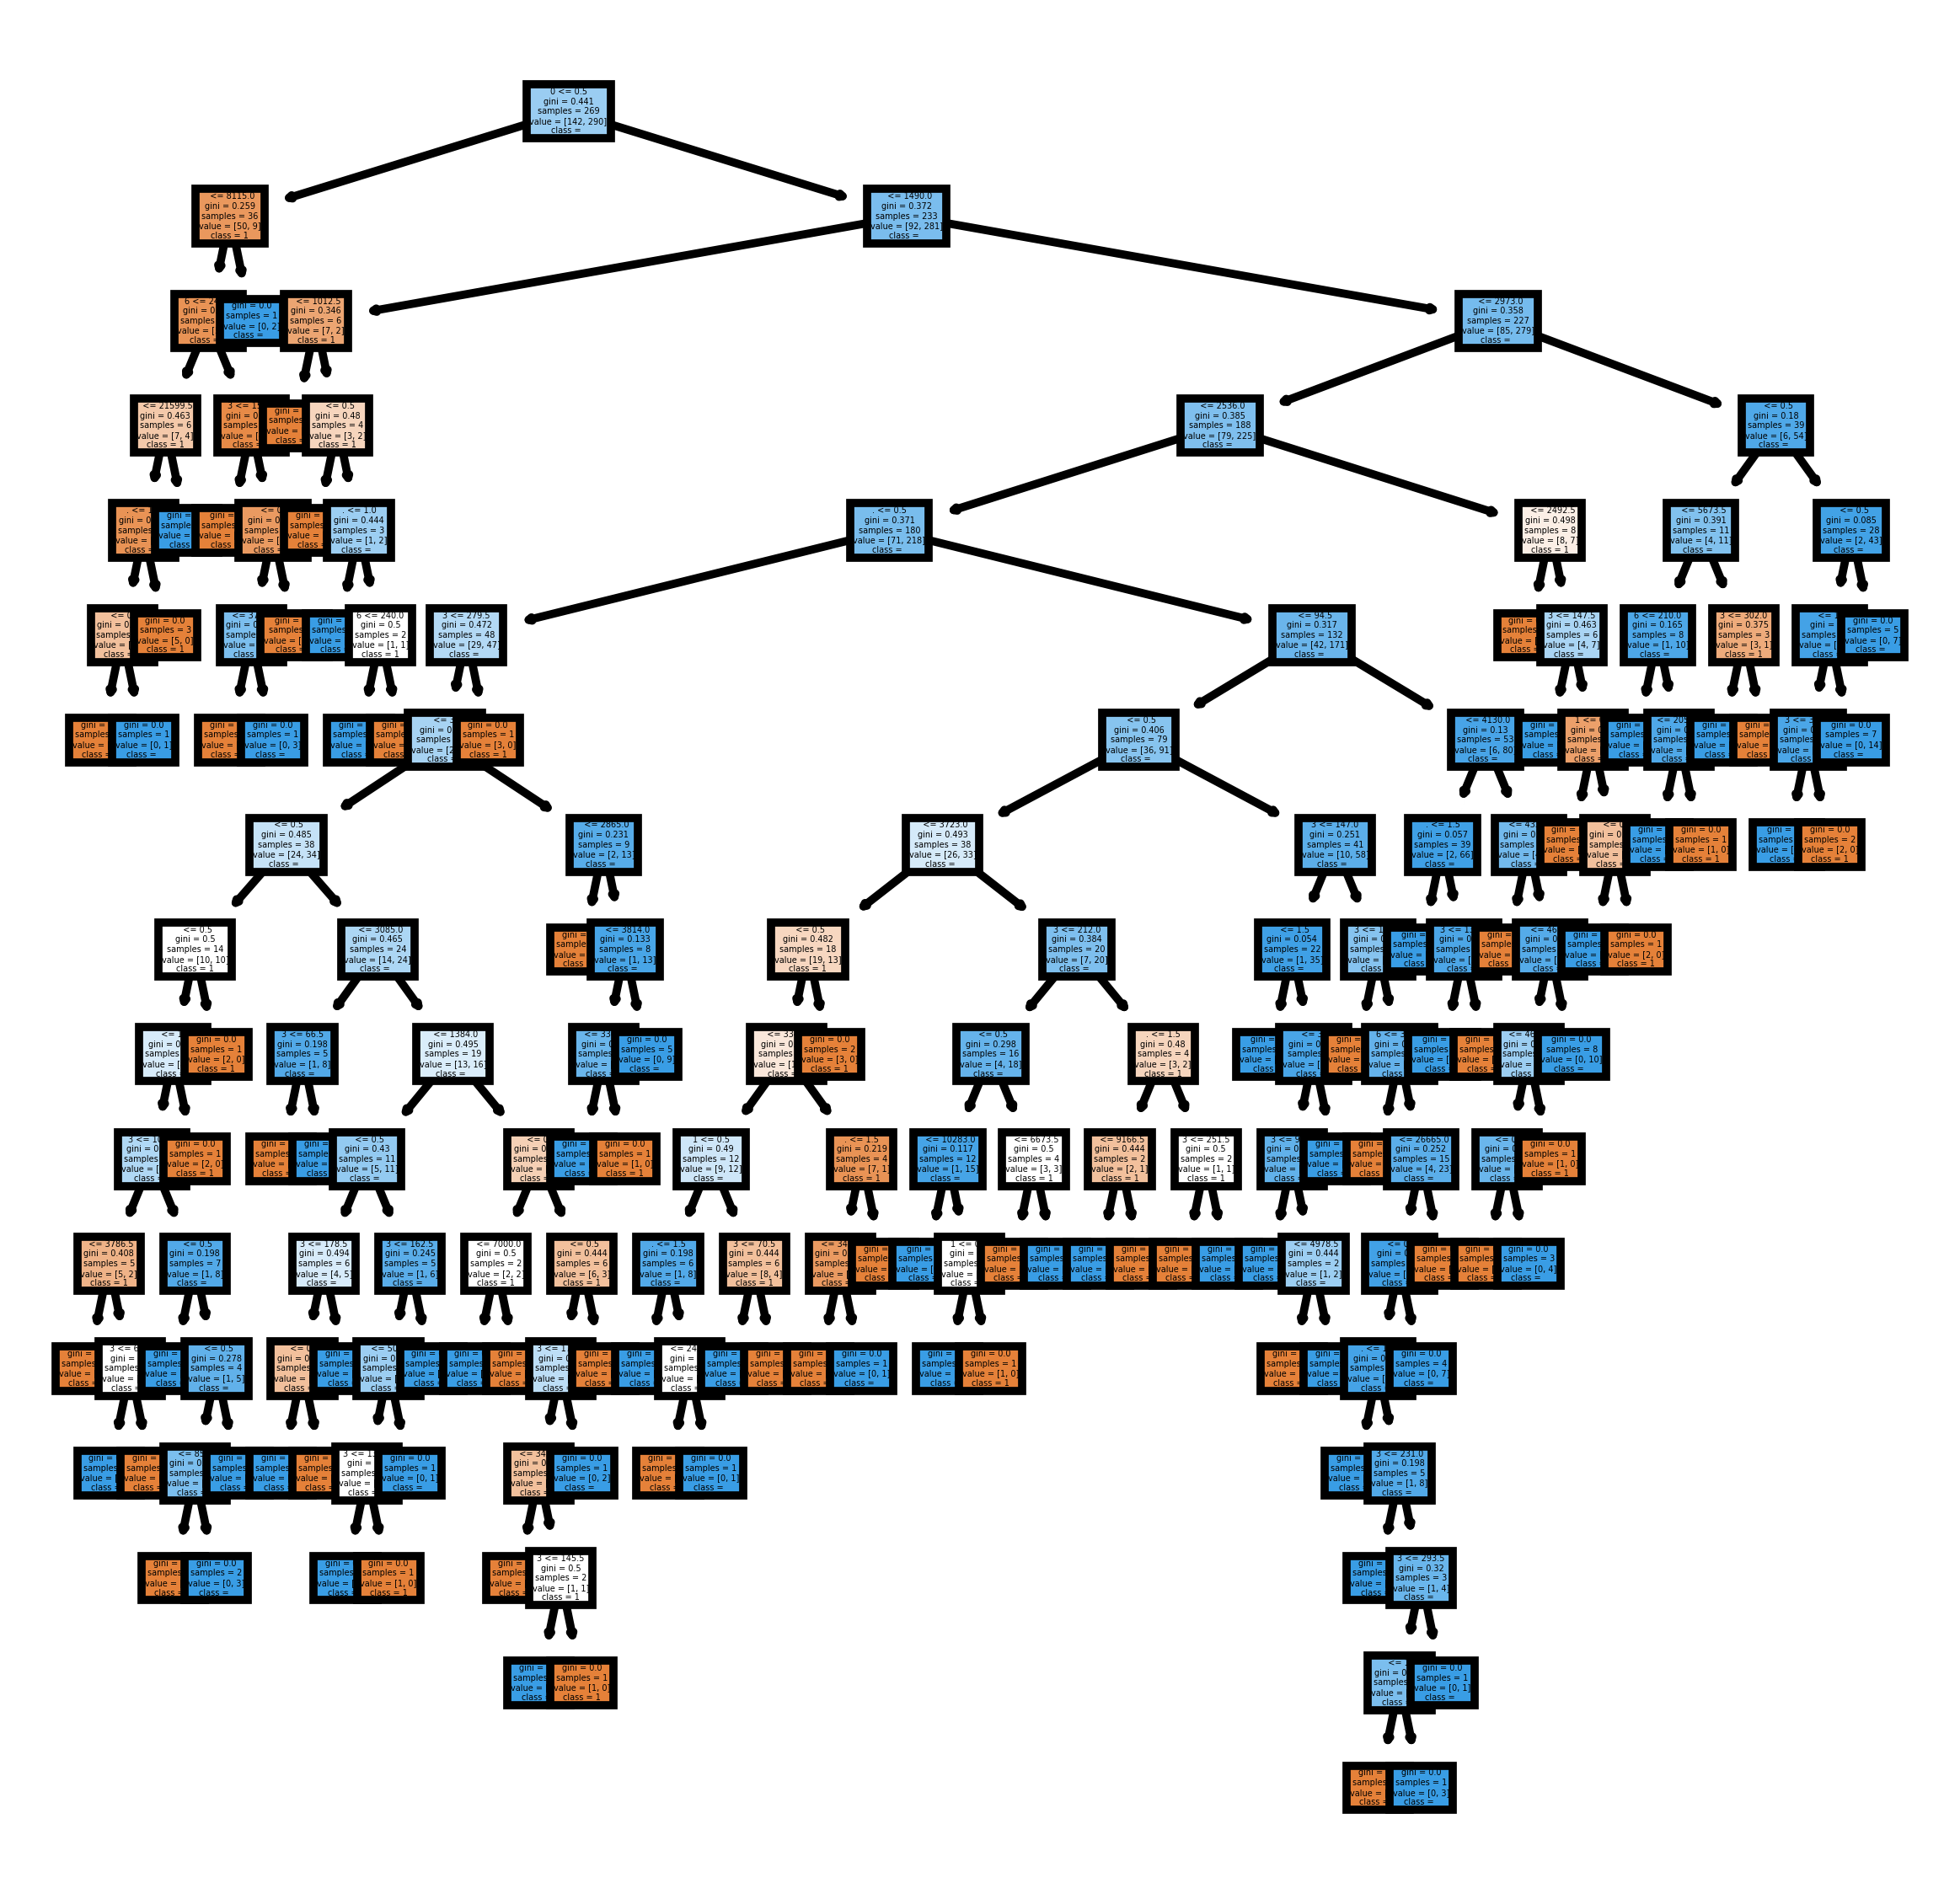

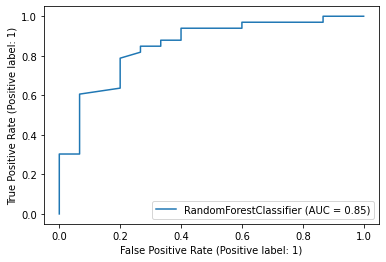


Matrix Of Training Random Forest = 
 [[133   0]
 [  0 299]]

Matrix Of Testing Random Forest = 
 [[ 9  6]
 [ 2 31]]
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.84      0.94      0.89        33

    accuracy                           0.83        48
   macro avg       0.83      0.77      0.79        48
weighted avg       0.83      0.83      0.83        48



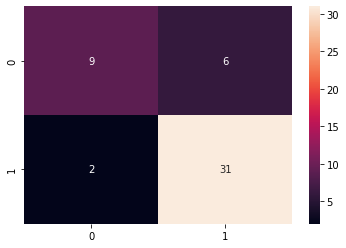

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.linear_model as lm

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, Y_train)

# Evaluate Model

# Predict the Train set results with criterion entropy
RF_Entropy_X_TrainPrediction = rf.predict(X_train)

# Calculate DM_Entropy_Training Data Accuracy
RF_Entropy_TrainingDataAccuracy = accuracy_score(RF_Entropy_X_TrainPrediction, Y_train)
print('RF_Entropy_Training Data Accuracy = ', RF_Entropy_TrainingDataAccuracy * 100)

# Predict the Test set results with criterion entropy
RF_Entropy_X_TestPrediction  = rf.predict(X_test)

# Calculate VM_TestiDM_Entropy_Training  Data Accuracy
RF_Entropy_TestDataAccuracy = accuracy_score(RF_Entropy_X_TestPrediction, Y_test)
print('RF_Entropy_TestDataAccuracy = ', RF_Entropy_TestDataAccuracy * 100)

### Visualization Model ###

fn = str(loan_dataset['Loan_Amount_Term'])
cn = str(loan_dataset['Loan_Status'])
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=700)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

fig.savefig('rf_individualtree.png')

print('\n')

metrics.plot_roc_curve(rf, X_test, Y_test) 
plt.show()

RF_Training_CM = confusion_matrix(Y_train, RF_Entropy_X_TrainPrediction)
print('\nMatrix Of Training Random Forest = \n', RF_Training_CM)
RF_Testing_CM = confusion_matrix(Y_test, RF_Entropy_X_TestPrediction)
print('\nMatrix Of Testing Random Forest = \n', RF_Testing_CM)

sns.heatmap(RF_Testing_CM, annot=True)
plt.savefig('RF_Testing_CM.png')

# printing the report
print(classification_report(Y_test, RF_Entropy_X_TestPrediction))

# **Testing Data** 


In [ ]:
### Import Packages
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import math
from sklearn.metrics import accuracy_score

### Data Collection & Preprocessing
NewCustomerDataset = pd.read_csv('New Customer.csv')
NewCustomerDataset.head()

# Show NO of rows, col in New Customer Dataset
NewCustomerDataset.shape

# Show statistical Measure
NewCustomerDataset.describe()

# Show No of Missing Values in Each col
NewCustomerDataset.isnull().sum()

# Dropping the missing values
NewCustomerDataset = NewCustomerDataset.dropna()

# No of Missing Values in Each col
NewCustomerDataset.isnull().sum()

# the frist 5 rows of DataFrame
NewCustomerDataset.head()

# Dependent col Values
NewCustomerDataset['Dependents'].value_counts()

# replacing the value of 3+ to 4
NewCustomerDataset = NewCustomerDataset.replace(to_replace='3+', value=4)


# convert categorical col to numerical Val
NewCustomerDataset.replace({'Married' : {'No': 0, 'Yes': 1}, 'Gender' : {'Male': 1, 'Female': 0}, 'Self_Employed': {'No': 0, 'Yes': 1}, 
'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2}, 'Education': {'Graduate': 1, 'Not Graduate': 0}}, inplace = True)

NewCustomerDataset = NewCustomerDataset.drop(columns= ['Loan_ID'], axis=1)
print(NewCustomerDataset)

#Predict values using test data (Naive Bayes)
pred_test = GNB2_classifier.predict(NewCustomerDataset)

dataframe = pd.DataFrame(NewCustomerDataset)

# adding the list to the dataframe as column using assign(column_name = data)
new_NewCustomerDataset = dataframe.assign(predictions = pred_test)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        1          0          1              0             5720   
1         1        1          1          1              0             3076   
2         1        1          2          1              0             5000   
4         1        0          0          0              0             3276   
5         1        1          0          0              1             2165   
..      ...      ...        ...        ...            ...              ...   
361       1        1          1          1              0             2269   
362       1        1          4          0              1             4009   
363       1        1          0          1              0             4158   
365       1        1          0          1              0             5000   
366       1        0          0          1              1             9200   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
new_NewCustomerDataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,predictions
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,2,1
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2,1
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2,1
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,2,1
5,1,1,0,0,1,2165,3422,152.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
361,1,1,1,1,0,2269,2167,99.0,360.0,1.0,1,1
362,1,1,4,0,1,4009,1777,113.0,360.0,1.0,2,1
363,1,1,0,1,0,4158,709,115.0,360.0,1.0,2,1
365,1,1,0,1,0,5000,2393,158.0,360.0,1.0,0,1


In [ ]:
mm = new_NewCustomerDataset[(new_NewCustomerDataset['predictions'] == 1) & (new_NewCustomerDataset['Married'] == 1) & (new_NewCustomerDataset['Property_Area'] == 1)]
TotalNumberOfTrue = len(mm.index)
print('TotalNumberOfTrue = ', TotalNumberOfTrue)
TotalNumber = len(new_NewCustomerDataset.index)
print('\nTotalNumber = ', TotalNumber)
TotalNumberOfFalse = TotalNumber - TotalNumberOfTrue
print('\nTotalNumberOfFalse = ',TotalNumberOfFalse)

print('\n Final = ' , ((TotalNumberOfTrue / TotalNumber)*100), '%')

TotalNumberOfTrue =  45

TotalNumber =  289

TotalNumberOfFalse =  244

 Final =  15.570934256055363 %
